In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
df = pd.read_csv("/Users/joaquinalborszamorano/Desktop/amz_uk_price_prediction_dataset.csv")

In [8]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
#1. Crosstab Analysis**:
   # - Create a crosstab between the product `category` and the `isBestSeller` status.
    
   # - Are there categories where being a best-seller is more prevalent? 
   
#*Hint: one option is to calculate the proportion of best-sellers for each category and then
#  sort the categories based on this proportion in descending order.*

In [39]:
crosstab_result = pd.crosstab(df["category"], df["isBestSeller"])
crosstab_result_sorted = crosstab_result.sort_values(by=True, ascending=False)
crosstab_result_sorted

# Grocery, Health & Personal Care, and Baby are the categories where being a best-seller is more prevalent


isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [49]:
#2. **Statistical Tests**:
    #- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    #- Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value






(np.float64(36540.20270061387), np.float64(0.0))

In [47]:
from scipy.stats.contingency import association

association(crosstab_result, method = "cramer")

0.1222829439760564

In [ ]:
#3. **Visualizations**:
	#- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

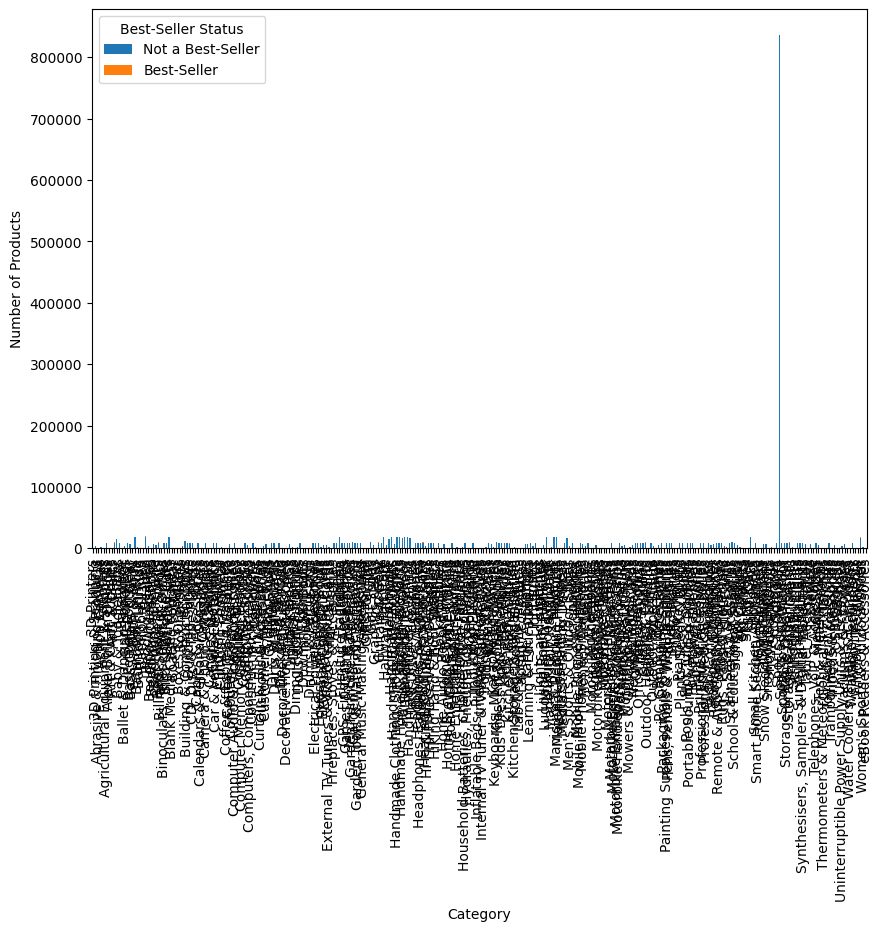

In [124]:
ax = crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#1f77b4', '#ff7f0e'])

plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.legend(title='Best-Seller Status', labels=['Not a Best-Seller', 'Best-Seller'])
plt.show()

In [ ]:
### Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#0. **Preliminary Step: Remove outliers in product prices.**

	#For this purpose, we can use the IQR (Interquartile Range) method. 
    # Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. 
    # The next steps will be done with the dataframe without outliers.
	
	#*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [125]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df_filtered

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
#1. **Violin Plots**:
   # - Which product category tends to have the highest median price? Don't filter here by top categories.
 #  - Use a violin plot to visualize the distribution of `price` across different product `categories`. 
 # Filter out the top 20 categories based on count for better visualization.





In [81]:
median_prices = df_filtered.groupby('category')['price'].median()

# Find the category with the highest median price
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()
highest_median_category , highest_median_price

# Desktop PC's have the highest median price

('Desktop PCs', np.float64(74.0))

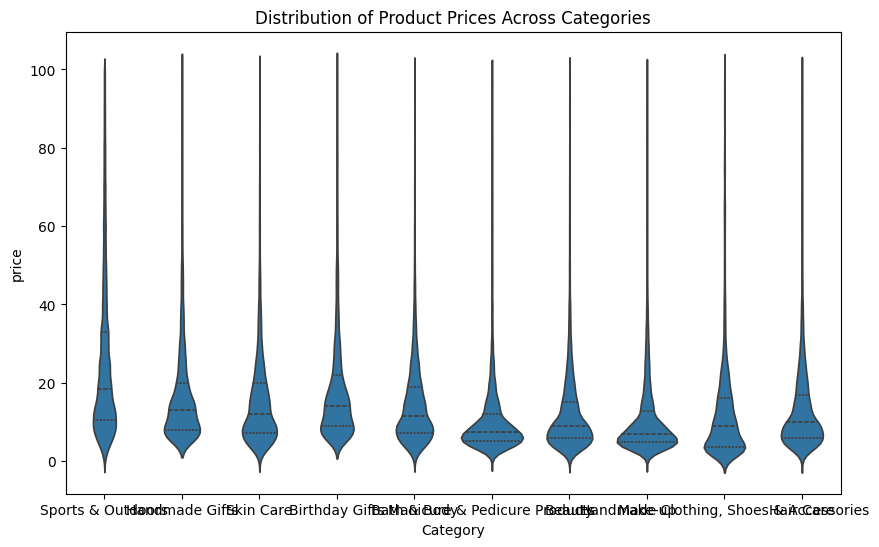

In [119]:
category_counts = df_filtered['category'].value_counts()


top_categories = category_counts.head(10).index

df_top_10 = df_filtered[df_filtered['category'].isin(top_categories)]

plt.figure(figsize=(10, 6))
sns.violinplot(x='category', y='price', data=df_top_10, inner='quartile')

plt.title('Distribution of Product Prices Across Categories')
plt.xlabel('Category')

plt.show()


In [ ]:
#2. **Bar Charts**:
 #   - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
  #  - Which product category commands the highest average price? Don't filter here by top categories.

/var/folders/6s/_0sz4qd138bbhl9jtknv8m000000gn/T/ipykernel_45318/4225494169.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='viridis')


<Axes: xlabel='category'>

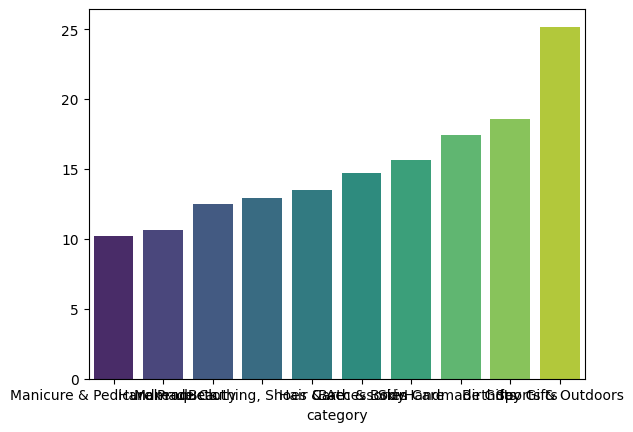

In [107]:
category_counts = df_filtered['category'].value_counts()

# Get top 10 categories based on count
top_categories = category_counts.head(10).index

avg_prices = df_top_10.groupby('category')['price'].mean().sort_values()
df_top_10 = df_filtered[df_filtered['category'].isin(top_categories)]
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='viridis')

# Sports & Outdoors is the category with highest average price

In [ ]:
#3. **Box Plots**:
    #- Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. 
    # Filter out the top 10 categories based on count for better visualization.
    #- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

/var/folders/6s/_0sz4qd138bbhl9jtknv8m000000gn/T/ipykernel_45318/491828653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top_10, palette='viridis')


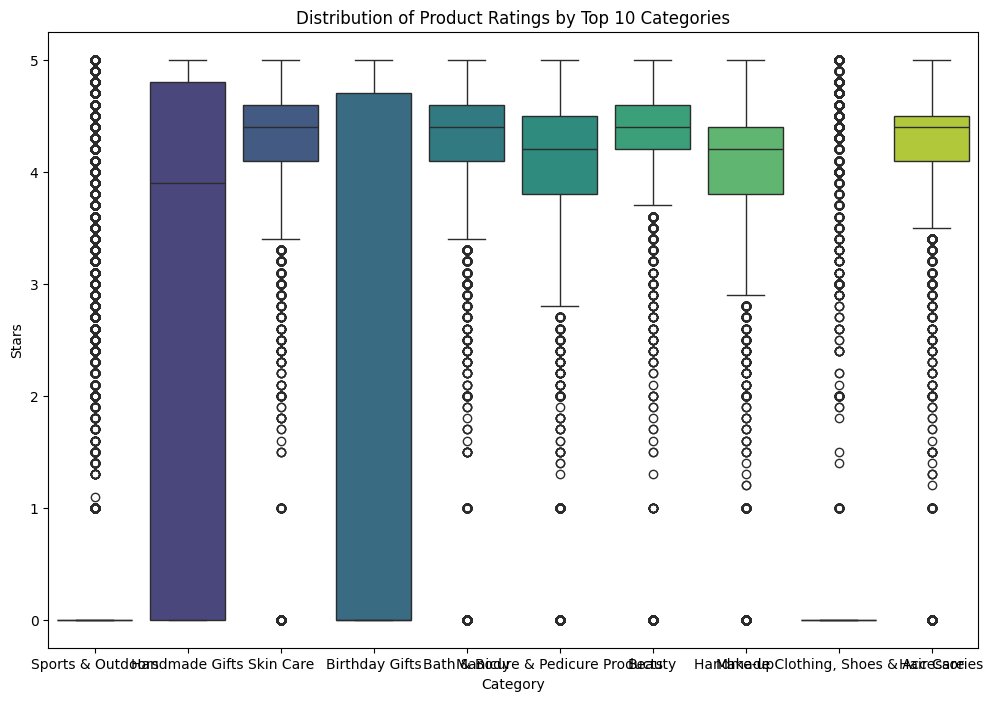

In [117]:


plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_10, palette='viridis')

plt.title('Distribution of Product Ratings by Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Stars')

plt.show()

In [ ]:
### Part 3: Investigating the Interplay Between Product Prices and Ratings

#**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

#1. **Correlation Coefficients**:
    #- Calculate the correlation coefficient between `price` and `stars`.
    #- Is there a significant correlation between product price and its rating? Not so much


In [132]:
correlation = df_filtered["price"].corr(df_filtered["stars"])
correlation

np.float64(-0.07767299878181001)

In [ ]:
#2. **Visualizations**:
   # - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe? There are some outliers and a lot without rating
    #- Use a correlation heatmap to visualize correlations between all numerical variables.
    #- Examine if product prices typically follow a normal distribution using a QQ plot. 

<Axes: xlabel='stars', ylabel='price'>

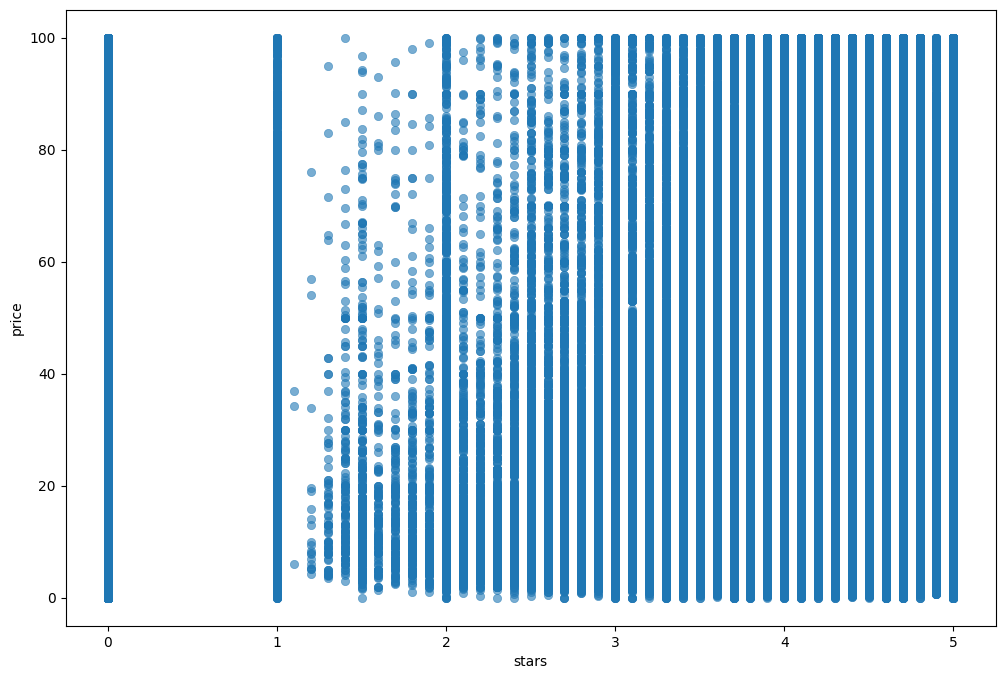

In [131]:
plt.figure(figsize=(12, 8))

# Create a scatter plot with seaborn
sns.scatterplot(x='stars', y='price', data=df_filtered, alpha=0.6, edgecolor=None)

In [133]:
df_numerical = df_filtered.select_dtypes("number")


,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


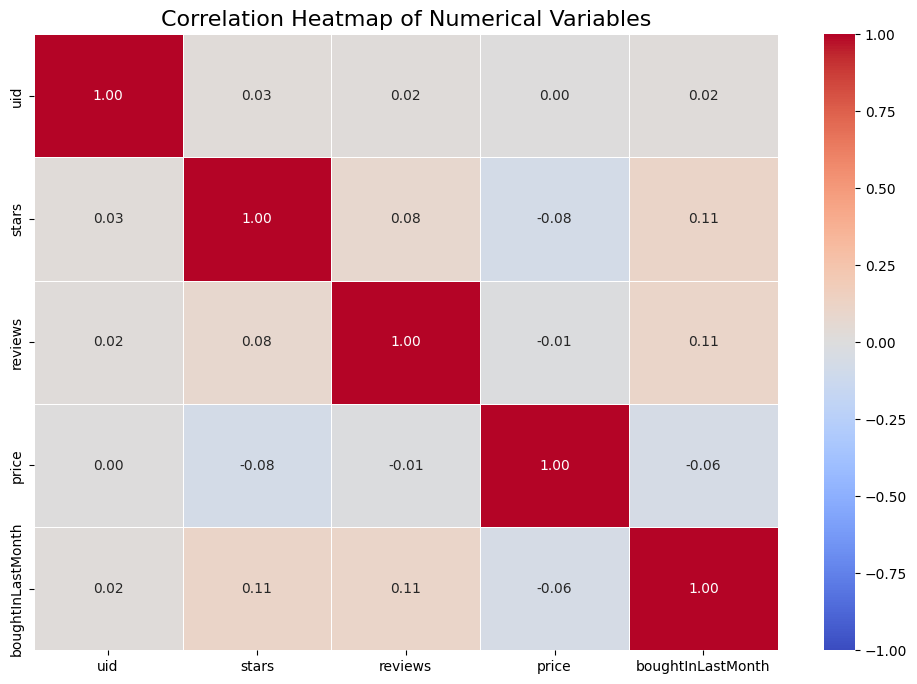

In [135]:
correlation_matrix = df_numerical.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Add titles and labels
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

In [ ]:
##**Bonus**: 

#- Do the same analysis without taking out the outliers. What are your insights?

In [136]:
median_prices = df.groupby('category')['price'].median()

# Find the category with the highest median price
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()
highest_median_category , highest_median_price

('Laptops', np.float64(1042.725))

/var/folders/6s/_0sz4qd138bbhl9jtknv8m000000gn/T/ipykernel_45318/4280870474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='viridis')


<Axes: xlabel='category'>

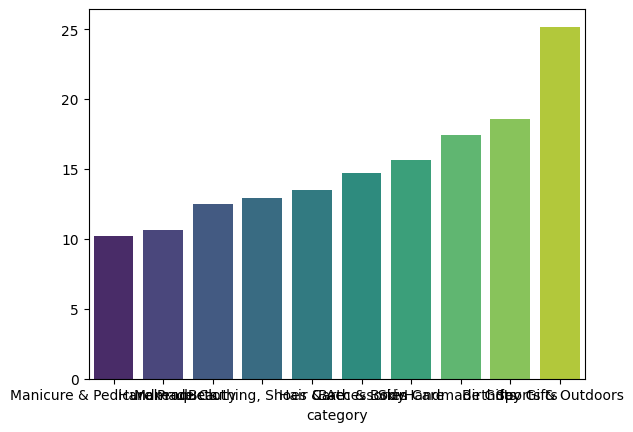

In [137]:
category_counts = df['category'].value_counts()

# Get top 10 categories based on count
top_categories = category_counts.head(10).index

avg_prices = df_top_10.groupby('category')['price'].mean().sort_values()
df_top_10 = df[df['category'].isin(top_categories)]
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='viridis')

<Axes: xlabel='stars', ylabel='price'>

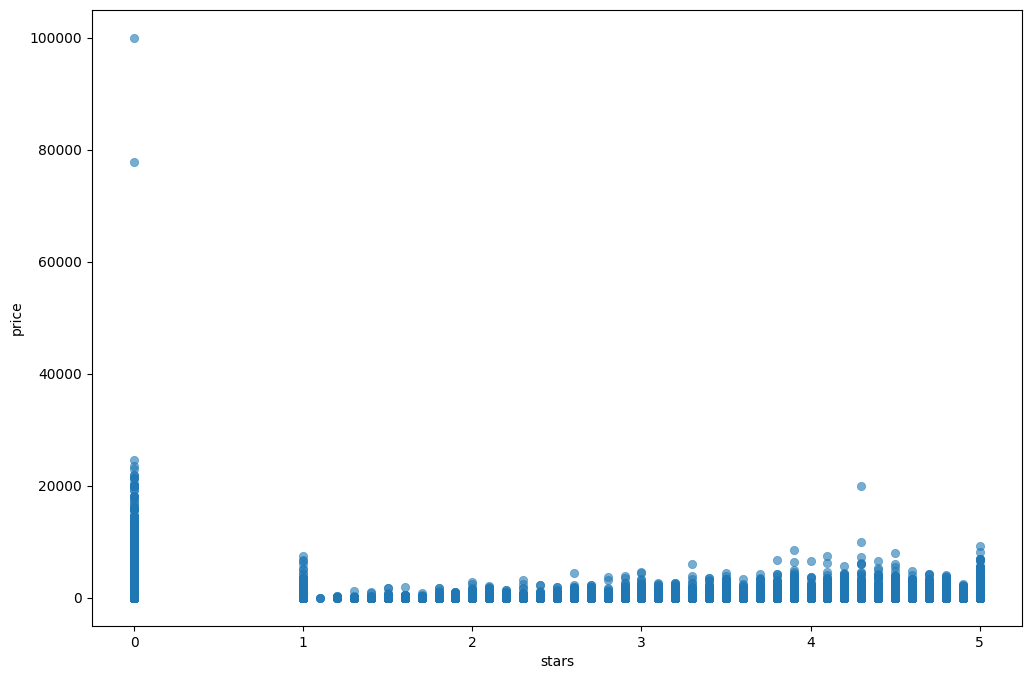

In [138]:
plt.figure(figsize=(12, 8))

# Create a scatter plot with seaborn
sns.scatterplot(x='stars', y='price', data=df, alpha=0.6, edgecolor=None)

In [139]:
correlation = df["price"].corr(df["stars"])
correlation

np.float64(-0.12490673262149321)

/var/folders/6s/_0sz4qd138bbhl9jtknv8m000000gn/T/ipykernel_45318/4280870474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='viridis')


<Axes: xlabel='category'>

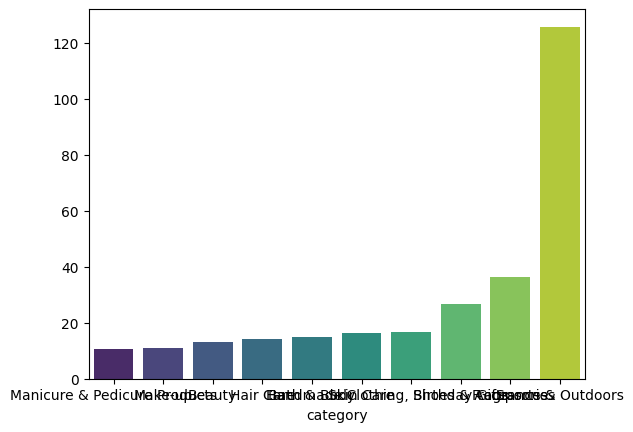

In [140]:
category_counts = df['category'].value_counts()

# Get top 10 categories based on count
top_categories = category_counts.head(10).index

avg_prices = df_top_10.groupby('category')['price'].mean().sort_values()
df_top_10 = df[df['category'].isin(top_categories)]
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='viridis')